#### Name:Saesha Wadhwa
#### Affiliation: University of Washington 

# Agricultural Pest Identification Using Machine Learning

## Research Questions

##### 1)Can machine learning models accurately classify agricultural pests from images?

This question explores the feasibility of using ML for pest identification, focusing
on model accuracy and reliability.

##### 2)How do environmental factors influence pest classification accuracy?

Investigates whether attributes like soil type or plant species affect model
performance, aiming to enhance real-world applicability.

##### 3)What are the distinctive features (e.g., size, color) of pests that aid in classification?


Examines which pest characteristics are most informative for ML models,
providing insights for farmers on key identification traits.

## Motivation

Coming from a country where agriculture is a major occupation, I have seen how pest
infestations cause major crop losses and financial hardship for farmers. Many still rely
on traditional identification methods or broad pesticides, which are often ineffective and
harmful to the environment.

My project aims to address this issue by using machine learning to identify agricultural
pests from images. It will test how accurately models/algorithms can classify pests,
study how environmental factors such as soil type or plant species affect classification,
and examine which visual features like size, color, and shape are most useful for
identification. The backgrounds in the images can also be studied to provide insights
into where certain pests are commonly found, helping connect pest type with habitat
conditions.

By answering these questions, my project aims to create reliable pest detection tools
that support farmers in early diagnosis and better pest management, ultimately
improving crop yield, reducing pesticide misuse,promoting sustainable farming and
reducing food waste.

## Data Setting

#### Primary Dataset: Agricultural Pests Image Dataset from Kaggle

This dataset comprises images of 12 different types of agricultural pests, including ants,
bees, beetles, caterpillars, earthworms, earwigs, grasshoppers, moths, slugs, snails,
wasps, and weevils.There are in total 5494 images and the distribution of images is
balanced for each type of insect about 470-500.

Link to dataset:
https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset

#### Supplementary Dataset: Web-scraped images using BeautifulSoup
To enhance the dataset, I will scrape additional pest images of these types from
agricultural websites. By doing this I can introduce more variability and real-world
pictures into the model training process.

My dataset doesn’t have an explicit datasheet. 

So, I will perform more analysis on this
while doing the project.Just by looking at some data,these are potential complications:

1) Scraped images vary in quality and labeling accuracy,so they could potentially
introduce noise into the dataset.

2) A few images contain multiple insects,so it’s uncertain how labels will be
assigned

3) Some Images lack contextual information about the environment, such as soil
type or plant species, which could influence pest classification.

## Method and Overview

Step 1: Data Collection

Data manipulation functions:

1) Download the Kaggle dataset and load it in.

2) Use BeautifulSoup to scrape images from agricultural websites that have
relevant images to the categories of my dataset.

3) I will then look through some test data just to see how it has been loaded in the
notebook.This can also be done for scraped data by only looking at some URLs.

Through this process I am trying to ensure that I have diverse data from many potential
sources to support my argument to identify features of the insect and its impact to
accurately identify them.

Step 2: Data Pre-processing and cleaning

Data manipulation functions:
    
1) Resize images to a uniform size

2) Apply techniques like rotation, flipping, and color adjustment to increase dataset
training.I will test each function on a small subset of images first and then
proceed further.

3) Check for missing blurry or missing images.

Through this process I am trying to ensure that I can determine whether using ML and
other algorithms can be beneficial to identify pests from images.

Step 3: Model Development

Data manipulation functions:
    
1) Implement Convolutional Neural Networks

2) Train the CNNs using tensorflow

3) Use other pretrained models.

4) I tested the model summary by tweaking parameters. Then ,saw how well the model
performs on some set of training and test data and then some other set to
ensure that the model fits with my questions.

Using CNN with TensorFlow meets the challenge goals of doing advanced machine
learning and is appropriate for doing image data analysis which is essential to my
project.


Step 4: Model Evaluation
Data manipulation functions:

1) Assessed model performance using accuracy, precision ,recall  and F1 score 
tests.

Plotting functions:

1) I plotted the difference in predicted and actual results to better visualise
where the models fail and where it gives accurate results.

The testing for can help identify which pests are misclassified.

### Importing all the important libraries

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import cv2
import os 
from pathlib import Path
import doctest

## Exploratory Data Analysis

##### Loading and reading in the data

In [28]:
data_dir='data'
os.listdir(data_dir)

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

#### Shape and size of data

In [29]:
data=tf.keras.utils.image_dataset_from_directory('data',
    labels='inferred',
    label_mode='categorical',
    class_names=['ants', 'bees', 'beetle','catterpillar','earthworms','earwig',
                 'grasshopper','moth','slug','snail','wasp','weevil'], 
    image_size=(128,128),
    batch_size=32)

Found 5497 files belonging to 12 classes.


In [30]:
data.class_names

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

In [31]:
data_iterator=data.as_numpy_iterator()

In [32]:
batch=data_iterator.next()

### Exploring a small batch of data

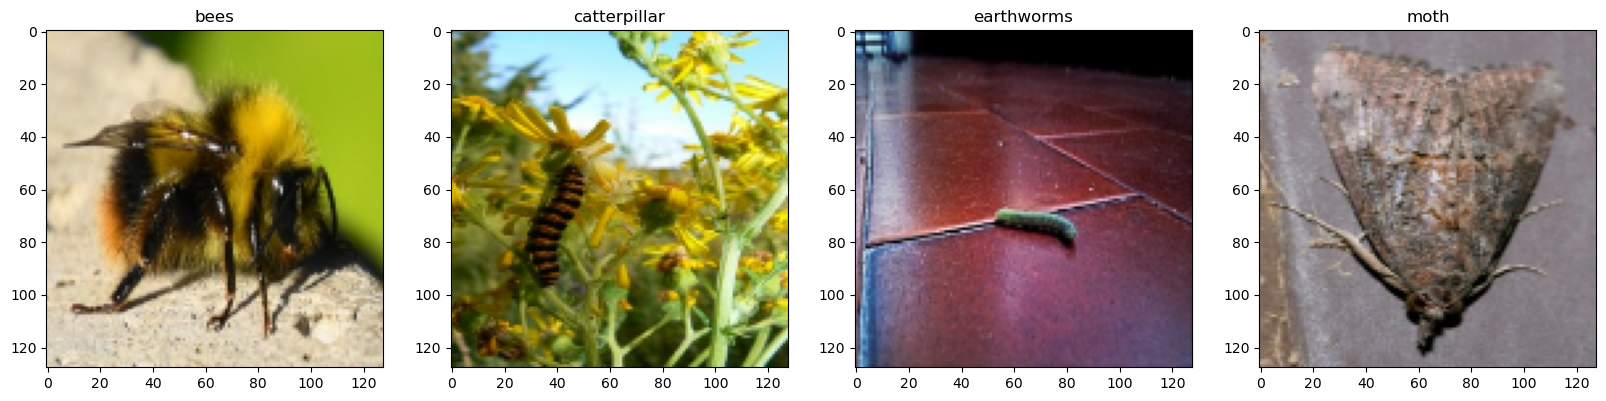

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))  

for idx, img in enumerate(batch[0][:4]):  
    ax[idx].imshow(img.astype(int))
    
   
    class_idx = np.argmax(batch[1][idx])
    class_name = data.class_names[class_idx]
    
    ax[idx].set_title(class_name)
    

plt.show()


## Rows and columns the dataset

In [34]:
def count_images_per_class(data_path, extensions=("*.jpg", "*.jpeg", "*.png")):
    """
    Counts the number of images per class in a directory structure.
    Takes in path, a string value, to the main data directory where each subdirectory is considered a class.
    and file extensions to include (default is ("*.jpg", "*.jpeg", "*.png")) are default or can be passed.It returns aDataFrame
    with columns "Class" and "Image Count", sorted by class name.

    >>> df_counts = count_images_per_class("data")
    
               Class  Image Count
    0           ants          499
    1           bees          500
    2         beetle          416
    3   catterpillar          434
    4     earthworms          323
    5         earwig          466
    6    grasshopper          485
    7           moth          497
    8           slug          391
    9          snail          500
    10          wasp          498
    11        weevil          485
        
    
    >>> print("Total images:", df_counts["Image Count"].sum())
    Total images: 5494
          
    """
    data_path = Path(data_path)  
    rows = []

    for class_dir in data_path.iterdir():
        if class_dir.is_dir():
            count = 0
            for ext in extensions:
                count += len(list(class_dir.glob(ext)))
            rows.append({"Class": class_dir.name, "Image Count": count})

    df_counts = pd.DataFrame(rows).sort_values("Class").reset_index(drop=True)
    return df_counts
doctest.testmod()

TestResults(failed=0, attempted=2)

#### DataFrame of images with column of rows of different classes and distribution of each kind of pest

In [35]:
df_counts=count_images_per_class('data')
df_counts

Class  Image Count
0           ants          499
1           bees          500
2         beetle          416
3   catterpillar          434
4     earthworms          323
5         earwig          466
6    grasshopper          485
7           moth          497
8           slug          391
9          snail          500
10          wasp          498
11        weevil          485

In [36]:
total_images = df_counts["Image Count"].sum()
print(f"Total number of images: {total_images}")

Total number of images: 5494


#### Checking for corrupted files in dataset folder and missing images

In [37]:
def check_missing(data_path, extensions=("*.jpg", "*.jpeg", "*.png")):
    """
    Counts images per class and identifies corrupted/unreadable image files. and file extensions to include ,("*.jpg", "*.jpeg", "*.png")) are default 
    or can be passed.It returns a list of pathlib.Path objects pointing to corrupted/unreadable image files.

    >>> check_missing('data',extensions=("*.jpg", "*.jpeg", "*.png"))
    []
    """
    data_path = Path(data_path)
    class_counts = {}
    corrupted_files = []

    
    for class_folder in data_path.iterdir():
        if class_folder.is_dir():
            image_files = []
            for ext in extensions:
                image_files.extend(list(class_folder.glob(ext)))
            
            
            
            
            for img_path in image_files:
                try:
                    with Image.open(img_path) as img:
                        img.verify()  
                except Exception:
                    corrupted_files.append(img_path)
    
    
    return corrupted_files
doctest.testmod()

TestResults(failed=0, attempted=3)

## Variables of Interest
#### Features of Data
##### Height, Width and color pixels of each image
Each image in the set represents an agricultural pest. Every pixel in the image holds three numerical values of Red,green and blue pixels, capturing the pest’s color, texture, and shape.

#### Relation to research

This information of color pixel is the basis to understand the visual features the models will learn from.
Each image pixel and pattern identified for each category will provide an insight into what are the speciffic characteristics of various kinds of pests. This will also provide information about the environment in which the pest is most generally finds habitation.

In [38]:
for images, labels in data.take(1):
    sample_img = images[0].numpy()
    print("Single image shape:", sample_img.shape)
    print("Height:", sample_img.shape[0])
    print("Width:", sample_img.shape[1])
    print("Channels:", sample_img.shape[2])

Single image shape: (128, 128, 3)
Height: 128
Width: 128
Channels: 3


#### Target variables
##### Categories of Pests:

'ants', 'bees', 'beetle', 'caterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil'

Each image is labeled according to the pest species it depicts.

#### Relation to research

The machine learning model must predict these categories accurately.
Comparing visual features across different classes will reveal which species are easily found, misevaluated or visually distinct.

## Image Processing
1)Height and width of each image has been set to 128 by 128 pixels to train models efficiently.

2)Pixels will be scaled to represent numbers between 0 and 1 for simpler interpratation, visualisation and comphrehension.

#### Summary of pixel values for a few images in a batch of data

In [39]:
for images, labels in data.take(1):
    batch = images.numpy()


R_mean = batch[:,:,:,0].mean()
G_mean = batch[:,:,:,1].mean()
B_mean = batch[:,:,:,2].mean()

print(f"Average pixel values per color (R, G, B): {R_mean:.2f}, {G_mean:.2f}, {B_mean:.2f}")
print(f"Pixel value range: {batch.min()} - {batch.max()}")


Average pixel values per color (R, G, B): 136.73, 137.56, 99.61
Pixel value range: 0.0 - 255.0


## Visualisation of Data

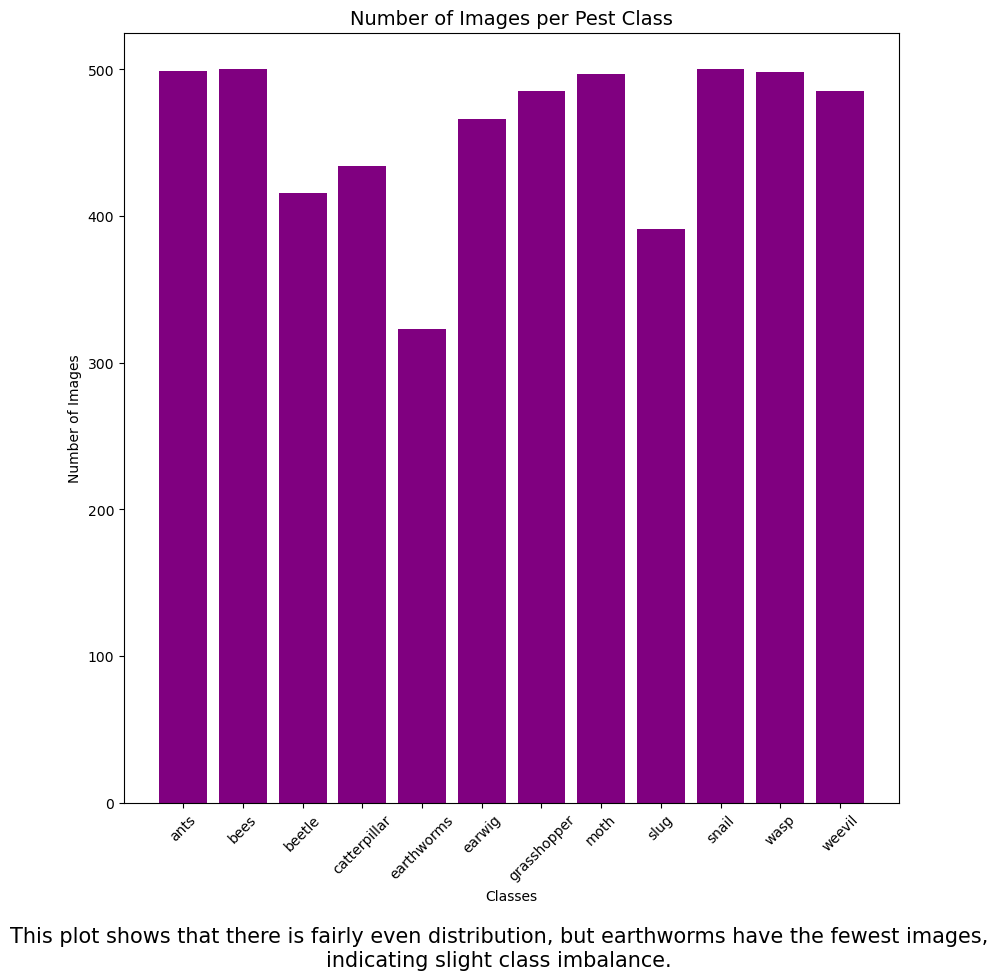

In [40]:
plt.figure(figsize=(10,10))
plt.bar(df_counts["Class"], df_counts["Image Count"], color='purple')
plt.xticks(rotation=45)
plt.title("Number of Images per Pest Class", fontsize=14)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.figtext(0.5, -0.05,
            "This plot shows that there is fairly even distribution, "
            "but earthworms have the fewest images, indicating slight class imbalance.",
            wrap=True, horizontalalignment='center', fontsize=15)
plt.show()


In [41]:
def compute_avg_rgb_per_class(data):
    """
    This function computes the average RGB values for each class of the TensorFlow dataset
    It takes in TensorFlow dataset as parameter.It returns a dataframe with the average values of 
    each class's RGB values as rows of the dataframe.
    """
   
    class_sums = {}
    class_counts = {}

    for class_name in data.class_names:
        class_sums[class_name] = np.array([0.0, 0.0, 0.0])
        class_counts[class_name] = 0

    
    for images, labels in data:
        images = images.numpy()
        labels = labels.numpy()

        for img, label in zip(images, labels):
            class_index = np.argmax(label)
            class_name = data.class_names[class_index]

            
            class_sums[class_name] += img.mean(axis=(0, 1))
            class_counts[class_name] += 1

    
    avg_rgb_per_class = {}
    for class_name in data.class_names:
        if class_counts[class_name] > 0:
            avg_rgb_per_class[class_name] = class_sums[class_name] / class_counts[class_name]
        else:
            avg_rgb_per_class[class_name] = np.array([0.0, 0.0, 0.0])

    
    df_avg_rgb = pd.DataFrame([
        {"Class": c, "Red": avg_rgb_per_class[c][0],
         "Green": avg_rgb_per_class[c][1],
         "Blue": avg_rgb_per_class[c][2]}
        for c in data.class_names
    ])

    return df_avg_rgb


In [42]:
df_long = compute_avg_rgb_per_class(data).melt(id_vars='Class', value_vars=['Red','Green','Blue'],
                          var_name='Channel', value_name='Average')
df_long.head()


Class Channel     Average
0          ants     Red  145.125111
1          bees     Red  131.135216
2        beetle     Red  123.036024
3  catterpillar     Red  116.906840
4    earthworms     Red  121.064994

##### Graph of average RGB values of each pest

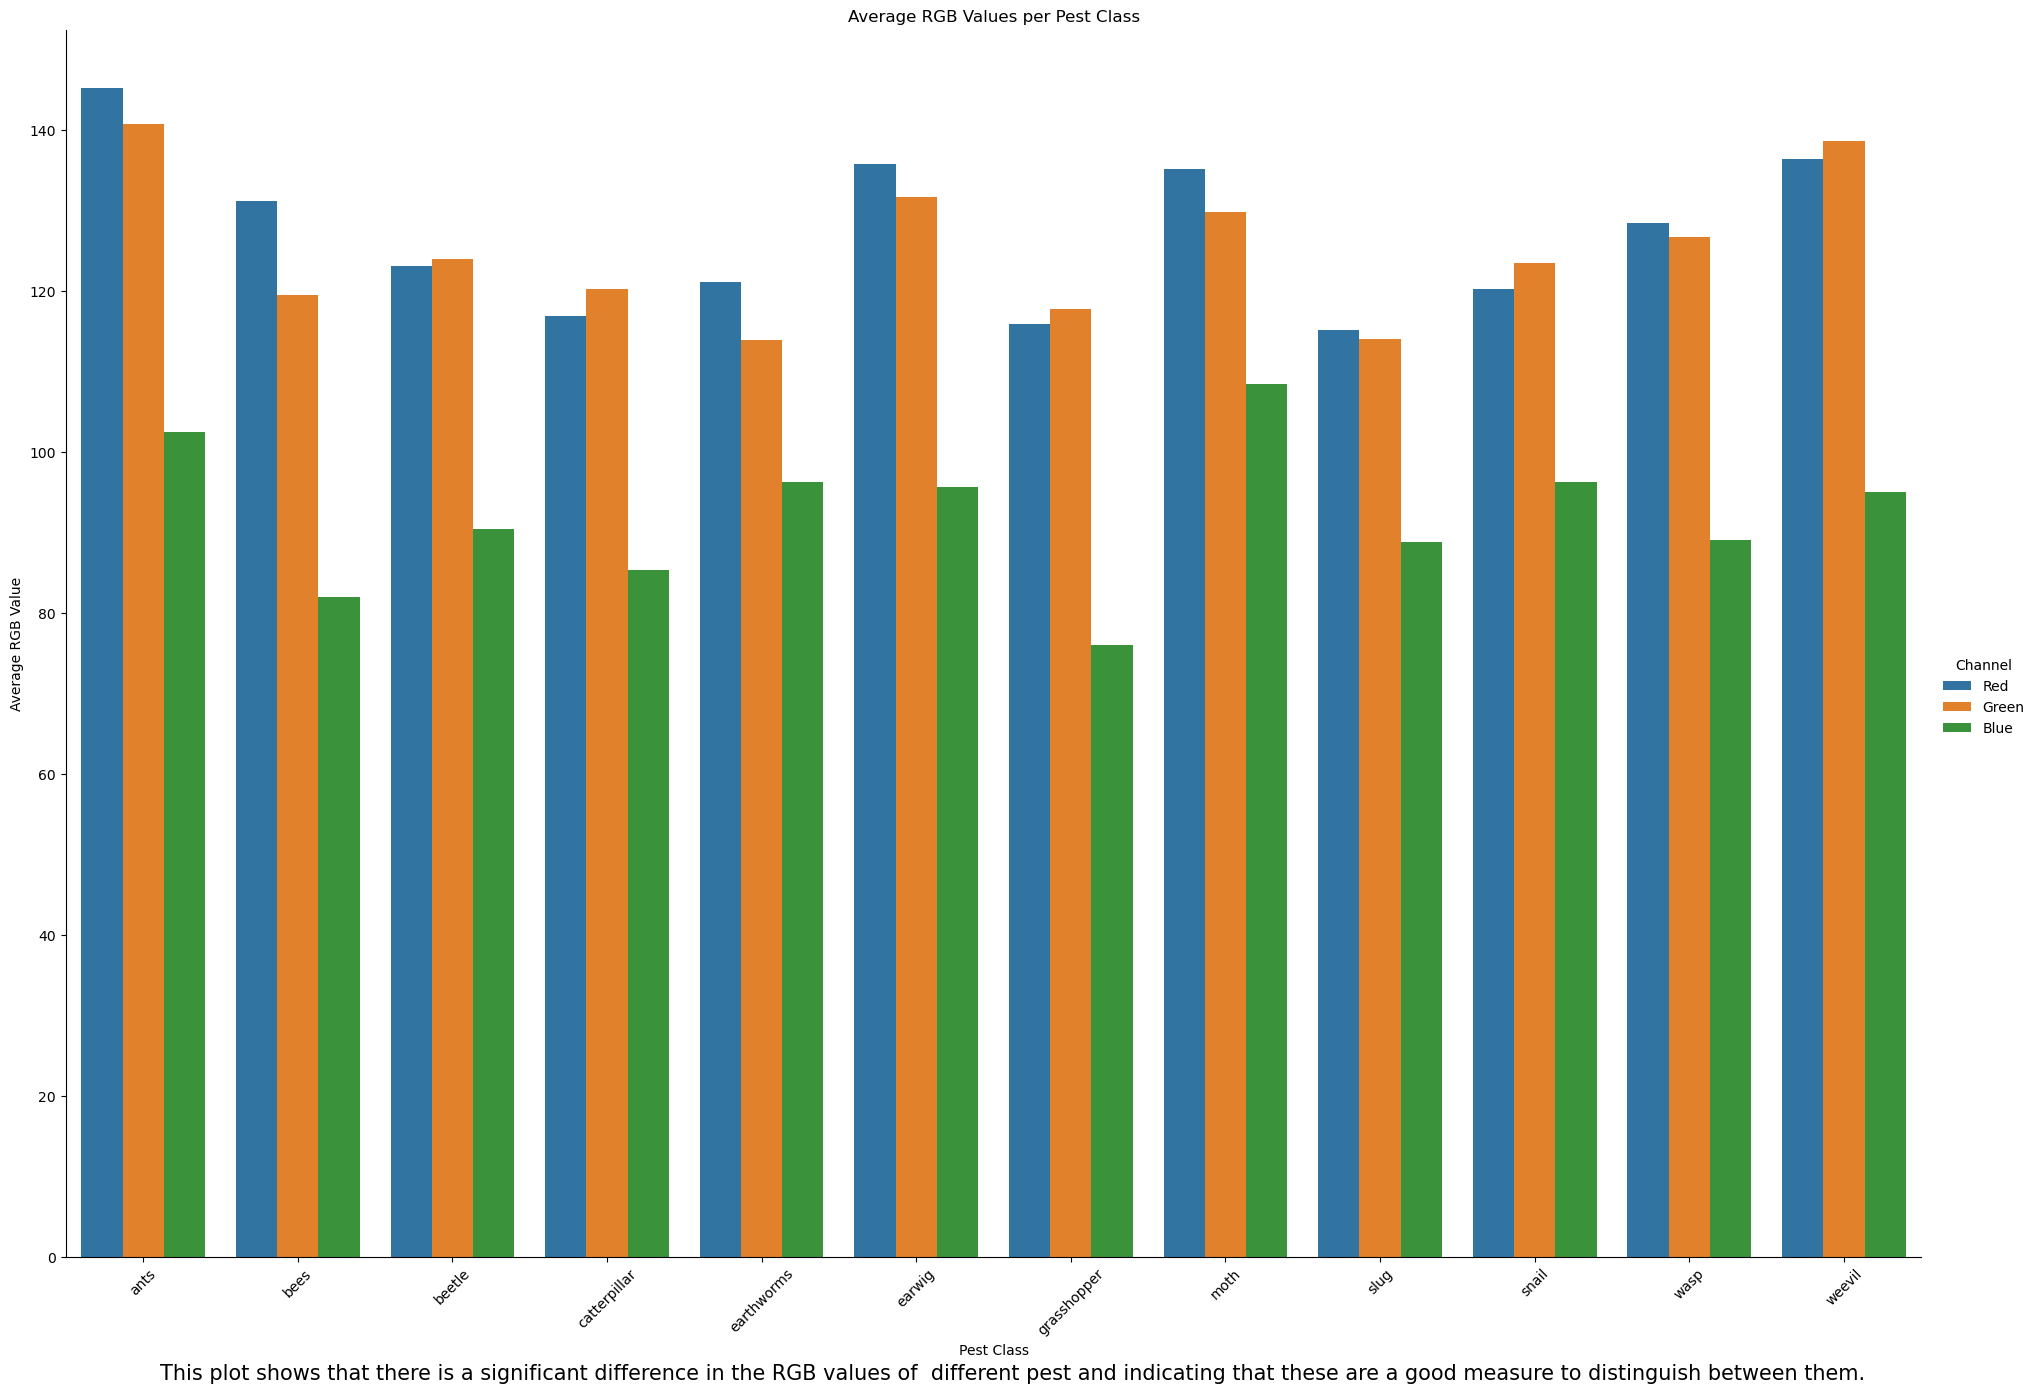

In [43]:
sns.catplot(
    data=df_long,
    x='Class',
    y='Average',
    hue='Channel',
    kind='bar',
    height=13,
    aspect=1.5
)

plt.title("Average RGB Values per Pest Class")
plt.xlabel("Pest Class")
plt.ylabel("Average RGB Value")
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05,
            "This plot shows that there is a significant difference in the RGB values of "
            " different pest and indicating that these are a good measure to distinguish between them.",
            wrap=True, horizontalalignment='center', fontsize=15)
plt.show()


### Challenge Goals

1) New Library -Beautiful Soup
My project will use the Beautiful Soup library to scrape information about
agricultural pests from online agricultural websites. This data may include pest
names, host plants, and environmental conditions where the pests are commonly
found. By combining this scraped data with my primary dataset, I want to create
a diverse dataset that connects image-based information with realistic pest
features and habitats. This aids in answering my research question about finding
environments of pests

2) Advanced Machine Learning using TensorFlow
I plan to train a Convolutional Neural Network using TensorFlow to classify pests
from images in the dataset. According to my research, CNN can learn many
things automatically from images like texture and pattern, etc. By experimenting
with CNN, I will analyze model accuracy and identify which visual traits are most
useful for pest identification

### Plan Evaluation

My proposed estimates were realistic and it was a learning curve to understand various different libraries in python. I have learnt about custom cnn models, efficientnetB0 (pretrained model), opencv,beautiful soup and libraries to iterate directories and files. I have done comphrensive and elaborate research on the materials and knowledge that I would require to complete this project. It required a commitnent of a few hours regularly. 

### Testing

I have added doctest to some functions, used functions like .head() to check if the Datframe is as expected, graphed visualisations to support my data cleaning. In addition to that I have performed some testing on small batches of data to verify results.

## Splitting data into train, test and validation set

In [48]:
import os
import shutil
import random


DATASET_DIR = "data"    
OUTPUT_DIR = "dataset_split"    

TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.15
TEST_SPLIT = 0.15

random.seed(42)


classes = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]

for cls in classes:
    src_dir = os.path.join(DATASET_DIR, cls)
    images = os.listdir(src_dir)
    images = [img for img in images if img.lower().endswith((".jpg", ".png", ".jpeg"))]

    random.shuffle(images)

    n = len(images)
    n_train = int(n * TRAIN_SPLIT)
    n_val = int(n * VAL_SPLIT)
   

    train_imgs = images[:n_train]
    val_imgs = images[n_train:n_train+n_val]
    test_imgs = images[n_train+n_val:]

   
    for folder in ["train", "val", "test"]:
        os.makedirs(os.path.join(OUTPUT_DIR, folder, cls), exist_ok=True)

   
    for img in train_imgs:
        shutil.copy(os.path.join(src_dir, img),
                    os.path.join(OUTPUT_DIR, "train", cls))

    for img in val_imgs:
        shutil.copy(os.path.join(src_dir, img),
                    os.path.join(OUTPUT_DIR, "val", cls))

    for img in test_imgs:
        shutil.copy(os.path.join(src_dir, img),
                    os.path.join(OUTPUT_DIR, "test", cls))

    print(f"Class '{cls}' → {len(train_imgs)} train, {len(val_imgs)} val, {len(test_imgs)} test")



Class 'ants' → 349 train, 74 val, 76 test
Class 'bees' → 350 train, 75 val, 75 test
Class 'beetle' → 291 train, 62 val, 63 test
Class 'catterpillar' → 303 train, 65 val, 66 test
Class 'earthworms' → 226 train, 48 val, 49 test
Class 'earwig' → 326 train, 69 val, 71 test
Class 'grasshopper' → 339 train, 72 val, 74 test
Class 'moth' → 347 train, 74 val, 76 test
Class 'slug' → 273 train, 58 val, 60 test
Class 'snail' → 350 train, 75 val, 75 test
Class 'wasp' → 348 train, 74 val, 76 test
Class 'weevil' → 339 train, 72 val, 74 test


### Training image set creation

In [50]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'dataset_split/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)   
    


Found 3841 files belonging to 12 classes.


### Validation image set creation

In [51]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'dataset_split/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)   
    

Found 818 files belonging to 12 classes.


In [52]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

## Building my custom CNN model

### Importing necessary libraries

In [54]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras import layers

In [67]:
model =Sequential()


### Building convolution layer for my custom model

Convolutions and max pooling

In [68]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [69]:
model.add(Dropout(0.25)) 

FLattening operations

In [70]:
model.add(Flatten())

In [71]:
model.add(Dense(units=512,activation='relu'))

In [72]:
model.add(Dropout(0.4)) 

In [73]:
#Output Layer
model.add(Dense(units=12,activation='softmax'))

Compiling the model

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,138,732 (50.12 MB)

 Trainable params: 13,138,732 (50.12 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [76]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=4)

Epoch 1/4
121/121 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.1390 - loss: 3.3854 - val_accuracy: 0.2408 - val_loss: 2.2863
Epoch 2/4
121/121 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.2622 - loss: 2.1887 - val_accuracy: 0.3068 - val_loss: 2.1112
Epoch 3/4
121/121 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3546 - loss: 1.9282 - val_accuracy: 0.3509 - val_loss: 1.9594
Epoch 4/4
121/121 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.4475 - loss: 1.6584 - val_accuracy: 0.3998 - val_loss: 1.8909


#### My model gave only 50 percent accuracy after many tries, so I only trained for a few epochs. I have next used EfficientNetB0 to better support my project goal. It is a pretrained model, and scales depth and width of image more efficiently, allowing it to learn complex image patterns

Custom Model evaluation on training set

In [77]:
train_loss,train_accu =model.evaluate(training_set)

121/121 ━━━━━━━━━━━━━━━━━━━━ 36s 295ms/step - accuracy: 0.6587 - loss: 1.1485


In [78]:
print(train_loss,train_accu)

1.1485199928283691 0.658682644367218


In [79]:
train_loss,train_accu =model.evaluate(training_set)

121/121 ━━━━━━━━━━━━━━━━━━━━ 36s 298ms/step - accuracy: 0.6587 - loss: 1.1485


## EfficientNetB0

In [83]:
from tensorflow.keras.applications import EfficientNetB0

In [84]:
efficient_net=EfficientNetB0(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [85]:
#freezing the bottom layers
for layer in efficient_net.layers:
    layer.trainable=False

In [86]:
from tensorflow import keras 
from tensorflow.keras import layers
model_eff=keras.Sequential([efficient_net,layers.GlobalAveragePooling2D(),keras.layers.Dense(1024,activation='relu'),keras.layers.Dense(512,activation='relu'),keras.layers.Dense(12,activation='softmax')])
model_eff.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model_eff.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,892,271 (22.48 MB)

 Trainable params: 1,842,700 (7.03 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [87]:
training_history_eff =model_eff.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 509ms/step - accuracy: 0.7050 - loss: 1.1277 - val_accuracy: 0.8227 - val_loss: 0.5385
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 53s 439ms/step - accuracy: 0.8563 - loss: 0.4570 - val_accuracy: 0.8435 - val_loss: 0.4594
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 87s 481ms/step - accuracy: 0.9058 - loss: 0.3197 - val_accuracy: 0.8533 - val_loss: 0.4331
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 495ms/step - accuracy: 0.9242 - loss: 0.2562 - val_accuracy: 0.8472 - val_loss: 0.4318
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 496ms/step - accuracy: 0.9511 - loss: 0.1864 - val_accuracy: 0.8509 - val_loss: 0.4274
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 57s 473ms/step - accuracy: 0.9677 - loss: 0.1396 - val_accuracy: 0.8545 - val_loss: 0.4293
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 61s 504ms/step - accuracy: 0.9727 - loss: 0.1140 - val_accuracy: 0.8533 - val_loss: 0.4309
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 494ms/step - accuracy: 0.9862 - loss: 0

In [88]:
train_loss_eff,train_accu_eff=model_eff.evaluate(training_set)

121/121 ━━━━━━━━━━━━━━━━━━━━ 46s 379ms/step - accuracy: 0.9990 - loss: 0.0210


In [89]:
print(f"the training loss is {train_loss_eff} and training accuracy is {train_accu_eff}")

the training loss is 0.021009167656302452 and training accuracy is 0.9989585876464844


In [90]:
val_loss_eff,val_Accu_eff= model_eff.evaluate(validation_set)

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.8557 - loss: 0.4629


In [91]:
print(f"the validation loss is {val_loss_eff} and validation accuracy is {val_Accu_eff}")

the validation loss is 0.4628925323486328 and validation accuracy is 0.8557457327842712


Saving the model

In [92]:
model_eff.save('efficient_net.keras')

In [93]:
training_history_eff.history

{'accuracy': [0.7050247192382812,
  0.85628741979599,
  0.9057537317276001,
  0.9242385029792786,
  0.9510543942451477,
  0.9677167534828186,
  0.9726633429527283,
  0.9862015247344971,
  0.9885446429252625,
  0.9908877611160278],
 'loss': [1.1277143955230713,
  0.45698800683021545,
  0.3197459280490875,
  0.2562359869480133,
  0.1864054650068283,
  0.13960526883602142,
  0.1139950156211853,
  0.08036234974861145,
  0.06747565418481827,
  0.05357780680060387],
 'val_accuracy': [0.8227384090423584,
  0.8435207605361938,
  0.8533007502555847,
  0.8471882343292236,
  0.8508557677268982,
  0.854523241519928,
  0.8533007502555847,
  0.8569682240486145,
  0.8569682240486145,
  0.8557457327842712],
 'val_loss': [0.5384892821311951,
  0.4594273567199707,
  0.43309029936790466,
  0.43175822496414185,
  0.42736685276031494,
  0.429259717464447,
  0.4309178292751312,
  0.4435773491859436,
  0.4635573923587799,
  0.4628925323486328]}

In [94]:
#Recording model in json
import json
with open("training_hist_eff.json","w") as f:
    json.dump(training_history_eff.history,f)


## Accuracy Visualisation for Effiecient Net

In [95]:
epochs =[i for i in range(1,11)]
epochs         

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

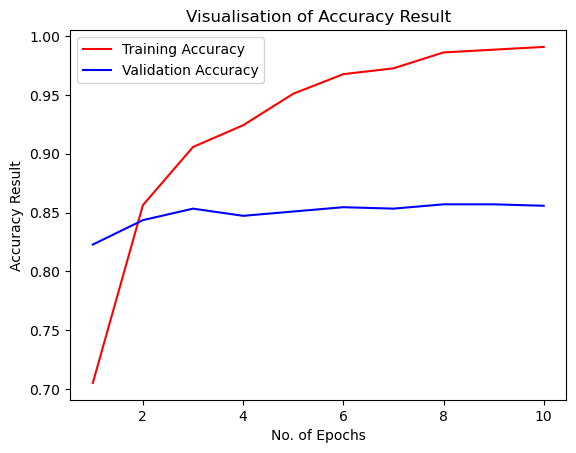

In [96]:
plt.plot(epochs,training_history_eff.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history_eff.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualisation of Accuracy Result")
plt.legend()
plt.savefig("accuracy_plot.png")
plt.show()


Metrics to evaluate the model

Calculation Precision,Recall and Confusion Matrix

In [97]:
class_name= validation_set.class_names
class_name

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

In [98]:
test_set=training_set=tf.keras.utils.image_dataset_from_directory(
    'dataset_split/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)   

Found 849 files belonging to 12 classes.


In [102]:
y_pred= model_eff.predict(test_set)

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step


In [103]:
predicted_categories= tf.argmax(y_pred,axis=1)#columnwise axis=1

In [104]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)

In [105]:
y_true=tf.argmax(true_categories,axis=1)#columnwise axis=1

## Observations and Result Caculations

## Calculating precision and recall 

(np.float64(-0.5), np.float64(659.5), np.float64(277.5), np.float64(-0.5))

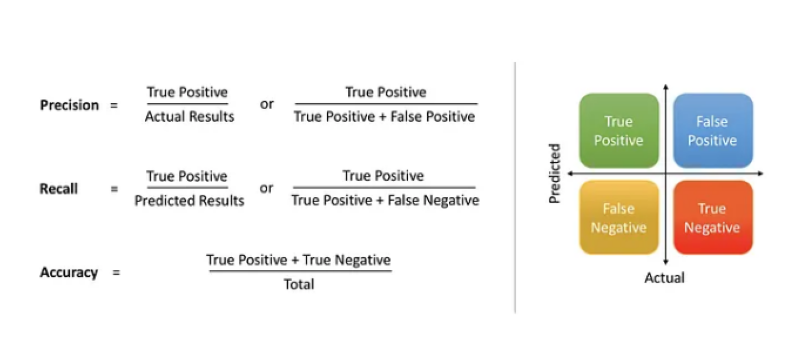

In [106]:
#defining precison and recall 
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("precision_recall.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

In [107]:
from sklearn.metrics import classification_report

In [108]:
report_dict = classification_report(
    y_true, 
    predicted_categories, 
    target_names=class_name,  # your list of class names
    output_dict=True          # <-- important to get dict instead of string
)

In [109]:
report_df = pd.DataFrame(report_dict).transpose()

In [110]:
report_df.round(3)

precision  recall  f1-score  support
ants              0.948   0.961     0.954   76.000
bees              0.958   0.920     0.939   75.000
beetle            0.708   0.648     0.676   71.000
catterpillar      0.786   0.667     0.721   66.000
earthworms        0.857   0.857     0.857   49.000
earwig            0.676   0.676     0.676   71.000
grasshopper       0.759   0.851     0.803   74.000
moth              0.973   0.961     0.967   76.000
slug              0.862   0.833     0.847   60.000
snail             0.962   1.000     0.980   75.000
wasp              0.936   0.961     0.948   76.000
weevil            0.897   0.975     0.934   80.000
accuracy          0.865   0.865     0.865    0.865
macro avg         0.860   0.859     0.859  849.000
weighted avg      0.863   0.865     0.863  849.000

### Most pest categories achieve high precision and recall values, particularly ants, snails, moths, wasps, and weevils, which all exceed 90% in at least one metric. These high values indicate that the model both identifies these pests correctly and makes very few incorrect predictions for them. Mid-performance classes such as earthworms, grasshoppers, and slugs also maintain balanced precision and recall, showing reliable detection. The lowest-performing classes like beetle, caterpillar, and earwig show reduced recall and F1-scores, confirming that these classes are more prone to misclassification.

In [111]:
report_df.to_csv("classification_report.csv", index=True)

(np.float64(-0.5), np.float64(712.5), np.float64(275.5), np.float64(-0.5))

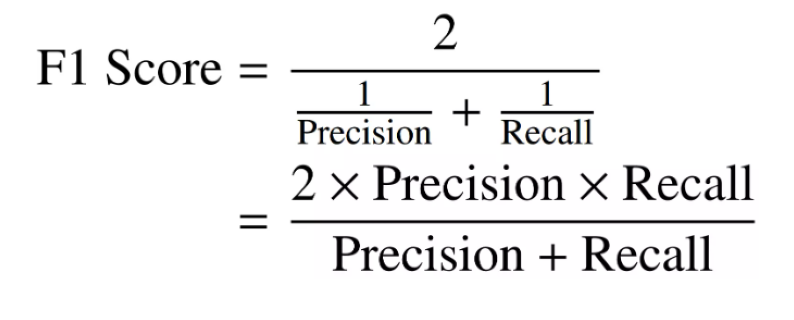

In [112]:
#defining F1 score
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("f1-score.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
cm= confusion_matrix(y_true,predicted_categories)

## Confusion matrix visualisation

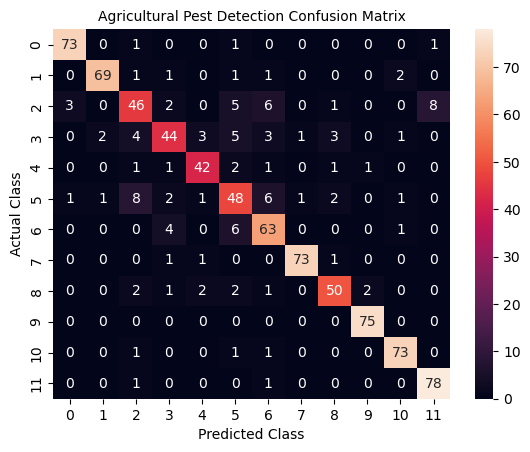

In [115]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Agricultural Pest Detection Confusion Matrix",fontsize=10)
plt.savefig("cm.png")

### The confusion matrix helps visualize the model’s performance: diagonal values represent correct predictions, while off-diagonal values show misclassifications. A strong confusion matrix typically displays bright diagonals and dark surrounding squares, indicating accurate predictions with minimal confusion. In my results, classes like ants, snails, bees, moths, and wasps have strong diagonal values and almost no confusion, confirming that the model identifies them reliably. However, classes such as earwig, beetle, and caterpillar show noticeable misclassification. For example, caterpillars are incorrectly predicted as beetles, earwigs, or earthworms, likely due to similar elongated shapes and overlapping visual features. These errors may be caused by similar colors, textures, or body structures across these pests. Improving these classes may require more training samples, stronger augmentation, or clearer feature representation.

## Testing on random images from google

Text(0.5, 1.0, 'Test Image')

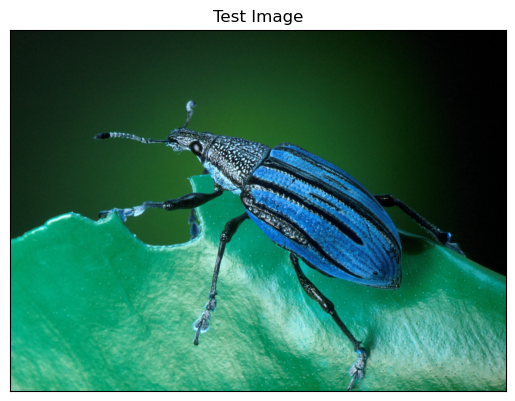

In [116]:
image_path = "weevil.jpg"
img= cv2.imread(image_path)
#Displaying image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title("Test Image")

Text(0.5, 1.0, 'Test Image')

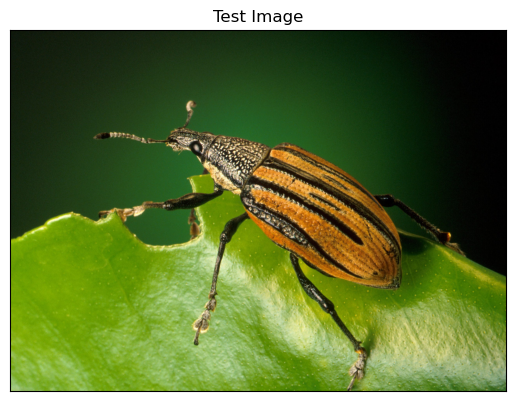

In [117]:
#convert from bgr to rgb
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title("Test Image")

## Testing model 

### preprocessing and converting to array 

In [118]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr])# convert to batch so convert to np array


In [119]:
prediction= model_eff.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [120]:
prediction# gives probabilty of image being in each of the classes

array([[3.2797470e-05, 1.1655402e-06, 9.7750968e-01, 1.2827842e-02,
        3.1530551e-05, 2.6781781e-04, 1.2965741e-03, 6.5720023e-04,
        1.0151447e-03, 2.6010661e-05, 2.1265149e-03, 4.2076381e-03]],
      dtype=float32)

In [121]:
result_index= np.argmax(prediction)
result_index

np.int64(2)

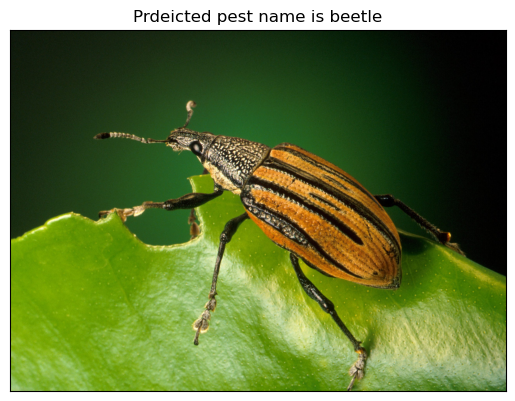

In [122]:
model_prediction1= class_name[result_index]
plt.imshow(img)
plt.title(f"Prdeicted pest name is {model_prediction1}")
plt.xticks([])
plt.yticks([])
plt.show()


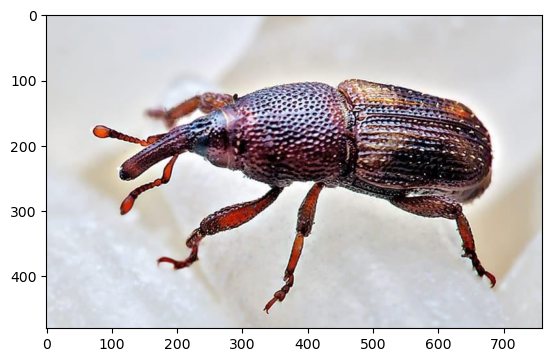

In [123]:
image_path2 = "weevil2.jpg"
img2= cv2.imread(image_path2)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
image2=tf.keras.preprocessing.image.load_img(image_path2,target_size=(128,128))
input_arr2= tf.keras.preprocessing.image.img_to_array(image2)
input_arr2= np.array([input_arr2])# convert to batch so convert to np array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


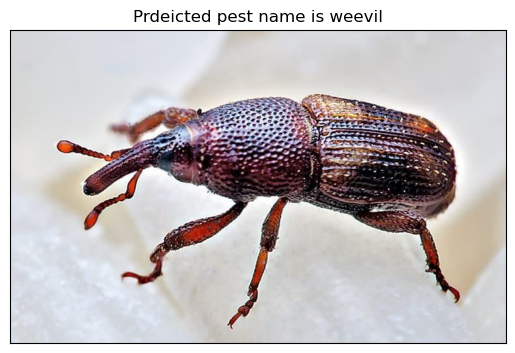

In [124]:
prediction2= model_eff.predict(input_arr2)
result_index2= np.argmax(prediction2)
result_index2
model_prediction2= class_name[result_index2]
plt.imshow(img2)
plt.title(f"Prdeicted pest name is {model_prediction2}")
plt.xticks([])
plt.yticks([])
plt.show()


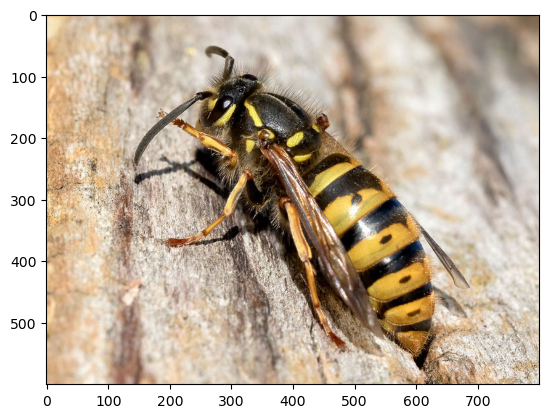

In [125]:
image_path3 = "wasp.jpg"
img3= cv2.imread(image_path3)
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.imshow(img3)
image3=tf.keras.preprocessing.image.load_img(image_path3,target_size=(128,128))
input_arr3= tf.keras.preprocessing.image.img_to_array(image3)
input_arr3= np.array([input_arr3])# convert to batch so convert to np array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


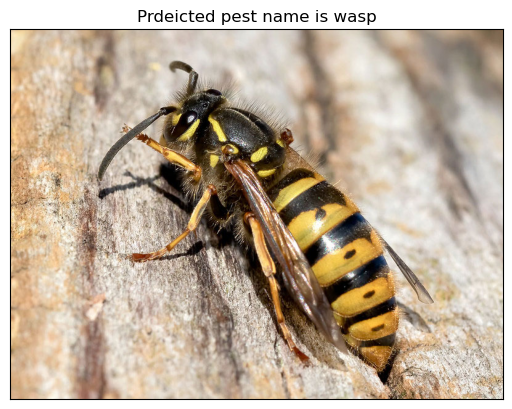

In [126]:
prediction3= model_eff.predict(input_arr3)
result_index3= np.argmax(prediction3)
result_index3
model_prediction3= class_name[result_index3]
plt.imshow(img3)
plt.title(f"Prdeicted pest name is {model_prediction3}")
plt.xticks([])
plt.yticks([])
plt.show()

## Challenge Goal 2: Web Scraping using Beautiful Soup

In [127]:
from bs4 import BeautifulSoup
import requests
import json

In [128]:
url ='https://www.wikihow.com/Remove-Ants-from-Potted-Plants'

In [129]:
page = requests.get(url)

In [130]:
soup = BeautifulSoup(page.text, 'html')

In [131]:
div=soup.find('div', class_ ="section_text" )

In [132]:
items = div.find_all('li')

In [133]:
all_pests ={}
ant_list =[]

In [283]:
for li in items:
    ant_list.append(li.text)
    print(li.text)
all_pests["ants"] =ant_list   

Add insecticides like permethrin or diatomaceous earth to your plant’s soil, or set ant traps armed with pesticides in or around the pot.
Submerge the pot in a mixture of water and dish soap for 15 minutes to flush out the ants.
Repot any plants with particularly stubborn or uncontrollable infestations, washing the pot with warm water and bleach, then adding fresh potting soil.
Deter ants with natural household items like essential oils, coffee grounds, or cinnamon, or set up a sticky trap around the base of the pot.


In [129]:
url_bee= 'https://www.flowerpower.com.au/garden-advice/pest-solutions/7-tricks-for-a-bee-free-garden/?srsltid=AfmBOorf9Kz4fIWuiSX4LYWqRq74uSUDwFihMx3HQ6ZIJ2RUj_U2D84Z'

In [130]:
page_bee = requests.get(url_bee)

In [131]:
soup_bee = BeautifulSoup(page_bee.text, 'html')

In [135]:
div_bee=soup_bee.find('div', class_ ="post-content" )

In [136]:
items_bee=div_bee.find_all('h4')

In [285]:
bee_list =[]
for h4 in items_bee:
    print(h4.text)
    bee_list.append(h4.text)
   
all_pests["bees"] =bee_list   

1. Avoid planting strong-scented flowers
2. Keep the area dry
3. Use essential oils
4. Try soap & water
5. Sprinkle baby powder
6. Harness the power of garlic
7. Versatile vinegar


In [139]:
url_beetle= 'https://bonnieplants.com/blogs/garden-fundamentals/cucumber-beetles'

In [140]:
page_beetle = requests.get(url_beetle)

In [141]:
soup_beetle = BeautifulSoup(page_beetle.text , 'html')

In [152]:
div_beetle = soup_beetle.find( 'div', class_ ="main-article")

In [165]:
items_beetle = div_beetle.find_all('li')[-3:]

In [356]:
beetle_list=[]
for li in items_beetle:
    beetle_list.append(li.text)
    print(li.text)
all_pests["beetle"]= beetle_list    


Fill yellow pails or yellow plastic butter dishes with soapy water. Beetles will fly in and drown. 

Buy traps. Yellow sticky traps work well, or you can buy traps specifically designed to catch cucumber beetles. 

Spray an insecticide, such as Ortho® Insect, Mite & Disease 3-in-1, following label instructions carefully. Spray blooming plants in the early morning or in the evening, when beneficial pollinators are less likely to be active.


In [167]:
url_catterpillar = 'https://ipm.ucanr.edu/home-and-landscape/leaf-feeding-caterpillars/#gsc.tab=0'

In [169]:
page_catterpillar = requests.get(url_catterpillar)

In [171]:
soup_catterpillar = BeautifulSoup(page_catterpillar.text , 'html')

In [172]:
div_catterpillar = soup_catterpillar.find('div' , class_ ="col-md-8 col-lg-8 col-sm-12 content-body")            

In [177]:
items_catterpillar = div_catterpillar.find_all('li')

In [357]:
catterpillar_list =[]
for li in items_catterpillar:
    catterpillar_list.append(li.text)
    print(li.text)
all_pests["catterpillar"] =catterpillar_list

Look for feeding holes, excrement, webbed or rolled leaves, caterpillars, and eggs. 
Prune off rolled or webbed leaves  and handpick caterpillars from plants.   Destroy  the insects by crushing them or by dropping them into soapy water.
Beneficial insects and other organisms often keep caterpillars under control..
Most caterpillar species have several species of parasitic wasps or flies that attack them. Look for parasite cocoons next to or on caterpillars, darkened caterpillar eggs, or exit holes in dead caterpillars.
General predators include birds, assassin bugs, lacewings, predaceous ground beetles, and spiders.
Naturally occurring diseases caused by viruses, bacteria, or fungi often kill caterpillars.
Use insecticides only when damage is intolerable, nonchemical methods haven't worked, and smaller caterpillars are present. Avoid insecticides that can kill beneficial insects.   Don't treat butterfly garden plants, otherwise you'll kill the caterpillars that will become butterflies.

In [180]:
url_earthworms = 'https://www.canr.msu.edu/ipm/diseases/earthworm?language_id='

In [181]:
page_earthworms = requests.get(url_earthworms)

In [182]:
soup_earthworms = BeautifulSoup( page_earthworms.text, 'html')

In [183]:
div_earthworms = soup_earthworms.find('div' , class_ = "fruit-detail-gallery")

In [188]:
img_tag =div_earthworms.find('img')

In [190]:
img_url = img_tag["src"]

In [204]:
from urllib.parse import urljoin
import requests

full_url = urljoin(url_earthworms, img_url)  
img_data = requests.get(full_url).content

with open("earthworm_soil.jpg", "wb") as f:
    f.write(img_data)

In [206]:
div_earthworms_text = soup_earthworms.find('div' , class_ = "small-12 large-8 cell gtm-conversions-content disease/insect/beneficial")										

In [207]:
items_earthworm =div_earthworms_text.find_all('p')[4:6]

Earthworms (Image A) become active when the ground thaws and will have multiple generations per season. Activity will slow down in late October as the ground temperature decreases.
Notes: Earthworms are only a problem on tees, greens and short-mowed fairways with heavy soils. They are desirable in home lawns and most turfgrass sites because they mix the soil and help decompose thatch.


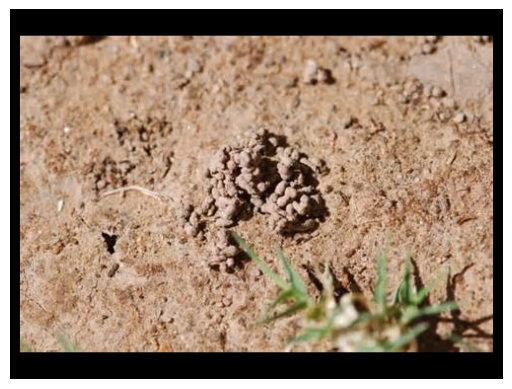

In [358]:
earthworm_list =[]
for p in items_earthworm:
    earthworm_list.append(p.text)
    print(p.text)
all_pests["earthworms"]= earthworm_list
img = Image.open("earthworm_soil.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [236]:
url_earwig = 'https://environmentalfactor.com/impact-of-earwigs-on-crops-management-approaches-to-control-them/'
page_earwig = requests.get(url_earwig)
soup_earwig = BeautifulSoup( page_earwig.text, 'html')

In [239]:
div_earwig = soup_earwig.find('div' , class_ ="post_text_inner")

In [241]:
items_earwig =div_earwig.find_all('ul')

In [359]:
earwig_list =[]
for ul in items_earwig:
    earwig_list.append(ul.text)
    print(ul.text)
all_pests["earwig"] = earwig_list


Sanitation: Regularly remove plant debris, weeds, and fallen fruits from the field to eliminate potential hiding spots.
Mulching: Use dry mulch instead of moist mulch to discourage earwig activity in the planting area.
Crop Rotation: Rotate crops annually to disrupt earwig breeding and feeding patterns.


Straw Traps: Place damp straw or newspaper near the base of crops. Earwigs will seek shelter there during the day, allowing you to collect and remove them.
Cardboard Traps: Similarly, cardboard traps coated with petroleum jelly can be effective in capturing earwigs.


Birds, Toads, And Frogs: Encourage these natural predators to inhabit your fields to feed on earwigs.
Beneficial Insects: Release beneficial insects like ground beetles and predatory wasps, which will target earwig eggs and nymphs.


Artificial Lights: Reduce the use of bright lights around fields as earwigs are attracted to light at night.
Water Management: Avoid over-irrigation, as excess moisture creates a favourable

In [244]:
url_gh = 'https://www.pesticide.org/grasshoppers'
page_gh = requests.get(url_gh)
soup_gh = BeautifulSoup( page_gh.text, 'html')

In [256]:
div_gh = soup_gh.find('div' , class_ ="text-content")
items_gh =div_gh.find_all('h5')[1:7]

In [360]:
gh_list =[]
for h5 in items_gh:
    gh_list.append(h5.text)
    print(h5.text)
all_pests["grasshopper"]= gh_list

1.    Hand Pick Insects & Protect Plants
2.    Grow a Green Border
3.    Natural Predators
4.    Neem Oil
5.   Traps
6.    Nosema Locustae Bait



In [258]:
url_moth = 'https://www.pesticide.org/moths_codling'
page_moth = requests.get(url_moth)
soup_moth = BeautifulSoup( page_moth.text, 'html')

In [267]:
div_moth = soup_moth.find('div' , class_ ="text-content")
items_moth =div_moth.find_all('h5')[1:9]

In [291]:
moth_list =[]
for h5 in items_moth:
    print(h5.text)
    moth_list.append(h5.text.strip())
all_pests["moth"] =moth_list

1.   Thinning Your Apple Crop
2.   Picking Up Dropped Apples
3.   Trapping Moths
4.   Trapping Caterpillars
5.   Bagging
6.   Biological Control: Trichogramma Wasps
7.   Natural Predators: Birds
8.   Biological Control: Codling Moth Virus


In [293]:
url_slug = 'https://www.pesticide.org/slugs?gad_source=1&gad_campaignid=1526251849&gbraid=0AAAAADNaaxubNcmyEw9yeFxau7HesnKgt&gclid=Cj0KCQiA0KrJBhCOARIsAGIy9wCLeLpne73EIGxRdrrV00qwSUjXhfNc-R_uC53ozI--EJJuN5xmdV4aAh-hEALw_wcB'
page_slug = requests.get(url_slug)
soup_slug = BeautifulSoup( page_slug.text, 'html')

In [296]:
div_slug = soup_slug.find('div' , class_ ="text-content")
items_slug =div_slug.find_all('h4')[1:7]

In [344]:
slug_list =[]
for h4 in items_slug:
    print(h4.text)
    slug_list.append(h4.text)
all_pests["slug"] =slug_list

2.  Grab Them!
3.  Traps
4.  Barriers
5.  Natural Predators
6.  Caffeine
7.  An Alternative Slug Bait


In [298]:
url_snail = 'https://www.gardeners.com/blogs/insect-pest-control-articles/controlling-snails-in-the-garden-7309'
page_snail = requests.get(url_snail)
soup_snail = BeautifulSoup( page_snail.text, 'html')

In [336]:
div_snail = soup_snail.find('div' , class_ ="article__rte rte rte--article")
items_snail =div_snail.find_all('ul')[2:]

In [342]:
snail_list =[]
for ul in items_snail:
    print(ul.text)
    snail_list.append(ul.text)
all_pests["snail"] =snail_list


Make your garden a haven for natural snail predators such as birds, frogs, toads, and ground beetles.
Handpick and destroy snails by dropping them in a jar of soapy water. You'll capture more if you go "hunting" at night. Use a slug trap or fill shallow containers with beer and sink them into the soil to trap slugs and snails.
In the evening, set out food traps such as cabbage leaves and pieces of potato. In the morning, destroy the snails that have gathered in the traps.



In [338]:
url_wasp = 'https://www.groworganic.com/blogs/articles/wasps-what-they-are-and-how-to-get-them-out-of-your-garden?srsltid=AfmBOorZz4qMJIk-5G7SBHzFqrIFtys5aiz05pYKuAgjw2DnWIZNU-Ag'
page_wasp = requests.get(url_wasp)
soup_wasp = BeautifulSoup( page_wasp.text, 'html')

In [339]:
div_wasp = soup_wasp.find('div' , class_ ="article-template__content page-width page-width--narrow rte")
items_wasp =div_wasp.find_all('ul')[-1:]

In [341]:
wasp_list =[]
for ul in items_wasp:
    print(ul.text)
    wasp_list.append(ul.text)
all_pests["wasp"] =wasp_list



Encourage Natural Predators: Birds and other wildlife can help control wasp populations.

Plant Wasp-Repelling Herbs: Grow mint, citronella, or eucalyptus around your garden to deter wasps.

Install Screens and Barriers: Use mesh screens on doors and windows to prevent wasps from entering your home.



In [346]:
url_weevil = 'https://farmonaut.com/blogs/weevil-control-secrets-7-hacks-for-massive-crop-yields'
page_weevil = requests.get(url_weevil)
soup_weevil = BeautifulSoup( page_weevil.text, 'html')

In [353]:
div_weevil = soup_weevil.find('div' , class_ ="entry-content clear")
items_weevil =div_weevil.find_all('ul')[2:3]

In [354]:
weevil_list =[]
for ul in items_weevil:
    print(ul.text)
    weevil_list.append(ul.text)
all_pests["weevil"] =weevil_list


Crop Rotation: Alternate crops such as alfalfa with cereals. Rotation interrupts the weevil life cycle, causing dramatic population reductions. For rice water weevil, non-rice years help break its cycle.
Field Sanitation: Remove plant residues, post-harvest debris, and weeds promptly. This eliminates habitats for overwintering adults and reduces food sources for larvae.
Harvest Timing for Alfalfa: Harvesting alfalfa 7-10 days before normal bloom can decrease weevil larvae by ~95%. Early cuttings prevent larvae from reaching damaging populations.
Water Management in Rice: Draining rice fields after flooding can expose larvae and eggs, reducing rice water weevil damage.



In [366]:
with open("pest_data.json", "w") as f:
    json.dump(all_pests, f, indent=4)

## Conclusion:
Overall, the model illustrates strong performance in agricultural pest detection, achieving an accuracy of 86% along with macro and weighted F1-scores of 0.85 and 0.86, respectively. Most pest categories are recognized with high confidence, and errors are primarily limited to insects with naturally similar appearances, such as beetle, caterpillar, and earwig. These results indicate that the model is reliable for practical pest-identification but  also suggests that additional training data or improvement is required for the visually similar classes.This answers my research question that ML models can be deployed to identify pests successfully.

### Impacts and Limitations:
As mentioned in my motivation, farmers lose a significant portion of yield and harvest due to pest infestations and misuse of insecticides. This work can serve as a tool for early detection, intervention, and prevention of crop damage, as well as for understanding insect anatomy non-invasively. It could particularly benefit small-scale farmers and the broader agricultural community. As I am still learning, I was unable to efficiently design a custom ML model, and the small dataset I used led to poor performance. Image data made it challenging to identify distinguishing features such as body parts, colors, or habitat that could aid detection and classification. Using a pretrained model limited the analysis to observing correct and incorrect classifications. Additionally, farmers without access to digital tools may not benefit, and misclassifications could result in improper pesticide use. Overall, the findings are preliminary, and larger datasets with more detailed analysis can improve accuracy and provide further insights.